In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

%matplotlib inline

In [2]:
data_dir = '../data/'

data = Table.read(data_dir+'neugent12_supergiants.fits').to_pandas()
data['Col'] = data['Col'].str.strip().str.decode('utf-8')
data['_2MASS'] = data['_2MASS'].str.strip().str.decode('utf-8')
bright = data['logL'] > 3.5
red = data['Col'] == 'R'
yellow = data['Col'] == 'Y'

sgs = data[bright]
rsgs = data[bright & red]
ysgs = data[bright & yellow]

rsg_coords = Table.read(data_dir+'rsg_coords.fits').to_pandas()
ysg_coords = Table.read(data_dir+'ysg_coords.fits').to_pandas()

rsg_coords['_2MASS'] = rsg_coords['_2MASS'].str.strip().str.decode('utf-8')
rsg_coords.drop(columns=['_RAJ2000','_DEJ2000'],inplace=True)
ysg_coords['_2MASS'] = ysg_coords['_2MASS'].str.strip().str.decode('utf-8')


rsgs = pd.merge(rsgs,rsg_coords,on='_2MASS')
ysgs = pd.merge(ysgs,ysg_coords,on='_2MASS')

Text(0, 0.5, '$\\log L/L_\\odot$ [K]')

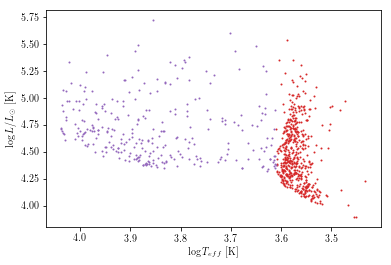

In [3]:
plt.scatter(rsgs['logTe'],rsgs['logL'],c='C3',s=1)
plt.scatter(ysgs['logTe'],ysgs['logL'],c='C4',s=1)

plt.gca().invert_xaxis()
plt.xlabel('$\log T_{eff}$ [K]')
plt.ylabel('$\log L/L_\odot$ [K]')

In [95]:
#Merge the dataframes, clean for bad columns
features = pd.read_csv(data_dir+'rsg_features.csv')
print(features['Name'][1])
features['Name'] = [f[:-2] for f in features['Name']]
rsg_df = pd.merge(rsgs,features,left_on='_2MASS',right_on='Name')
rsg_df.drop_duplicates(subset='_2MASS',inplace=True)
rsg_df.drop(columns=['_2MASS','Cat','Col','RAJ2000','DEJ2000','Unnamed: 0',
                     'Name','CAR_mean','CAR_sigma','CAR_tau','cDRW_mean',
                     'cDRW_sigma','cDRW_tau'],inplace=True)
rsg_df

J04434290-6746555ne


,logTe,logL,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CMD_r_squared,CMD_slope,Color,Con,...,SlottedA_length,SmallKurtosis,Std,StetsonJ,StetsonK,StetsonK_AC,StetsonL,StructureFunction_index_21,StructureFunction_index_31,StructureFunction_index_32
0,3.589,5.533,0.36575,1.000000,48.0,0.358491,0.919337,0.811527,-0.307589,0.000000,...,0.198144,-1.250890,0.231897,2.823503,0.915338,1.000000,2.746408,1.745510,2.293513,1.325451
2,3.576,5.350,0.20100,1.000000,20.0,0.306931,0.871258,1.139735,-0.182173,0.000000,...,0.065960,-0.704932,0.113382,-0.417553,0.821431,0.741537,-0.324461,1.443049,1.646276,1.159672
4,3.605,5.349,0.13650,1.000000,61.0,0.382979,0.750801,1.092245,-0.154476,0.000000,...,0.198144,-1.208606,0.083017,0.202023,0.888921,1.000000,0.161385,1.666363,2.128652,1.307174
6,3.561,5.307,0.33600,1.000000,31.0,0.377049,0.935302,0.894992,-0.324902,0.000000,...,9.696267,-1.356805,0.211493,2.011627,0.902667,0.854191,1.689485,1.694319,2.183396,1.304860
8,3.592,5.232,0.14700,0.999999,12.0,0.321839,0.824568,1.244479,-0.062494,0.000000,...,1.190528,-0.493574,0.084886,-0.657181,0.860804,1.000000,-0.557874,1.728754,2.237377,1.315181
10,3.550,5.222,0.47275,1.000000,33.0,0.394737,0.914936,0.666607,-0.033724,0.000000,...,12.598551,-1.684958,0.352573,6.686170,0.917423,0.826355,6.807908,1.834658,2.543722,1.399443
12,3.563,5.201,0.15650,1.000000,39.0,0.413127,0.816639,0.908708,-0.218398,0.000000,...,14.313537,-1.313973,0.100227,1.008441,0.899743,0.757108,0.883318,1.577664,1.969123,1.258678
14,3.558,5.181,0.21700,1.000000,48.0,0.452663,0.882354,0.951452,-0.144840,0.000000,...,0.065920,-0.871249,0.133814,0.802215,0.866878,1.000000,0.667007,1.722089,2.243200,1.328472
16,3.578,5.162,0.22000,1.000000,15.0,0.341463,0.805228,1.004213,-0.117762,0.000000,...,2.572479,-0.492329,0.125025,0.595922,0.872592,0.797584,0.429143,1.771888,2.414334,1.381867
18,3.552,5.153,0.09300,0.676411,1.0,0.258929,0.576157,1.456314,0.118884,0.004505,...,0.065961,0.823406,0.046622,-0.257035,0.784659,0.687347,-0.214877,1.496390,1.806093,1.225472


In [33]:
rsg_df.columns

Index(['logTe', 'logL', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CMD_r_squared', 'CMD_slope', 'Color', 'Con', 'DRW_mean',
       'DRW_sigma', 'DRW_tau', 'Eta_color', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_0',
       'Freq1_harmonics_rel_phase_1', 'Freq1_harmonics_rel_phase_2',
       'Freq1_harmonics_rel_phase_3', 'Freq2_harmonics_amplitude_0',
       'Freq2_harmonics_amplitude_1', 'Freq2_harmonics_amplitude_2',
       'Freq2_harmonics_amplitude_3', 'Freq2_harmonics_rel_phase_0',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3_harmonics_amplitude_1', 'Freq3_harmo

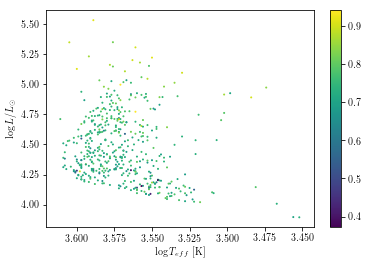

In [93]:
plt.scatter(rsg_df['logTe'],rsg_df['logL'],c=rsg_df['StetsonK'],s=1)

plt.gca().invert_xaxis()
plt.colorbar()
plt.xlabel('$\log T_{eff}$ [K]')
plt.ylabel('$\log L/L_\odot$');

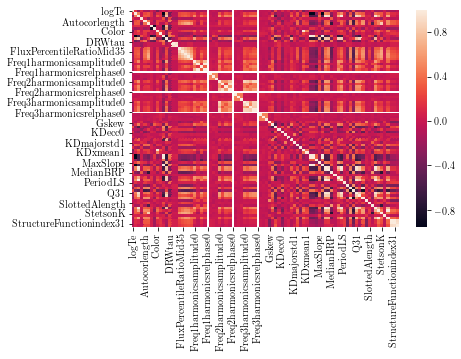

In [21]:
corr = rsg_df.corr()
for i,c in enumerate(corr.columns):
    if '_' in c:
        newname = c.replace('_','')
        corr.rename(columns={c:newname},index={c:newname},inplace=True)
sns.heatmap(corr)

In [25]:
#Let's get rid of all any columns (except )
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(2,corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = rsg_df.columns[columns]
cleaned_df = rsg_df[selected_columns]
for c in rsg_df.columns:
    if c not in cleaned_df.columns:
        print(c)
len(cleaned_df.columns)

Eta_e
Freq1_harmonics_amplitude_3
KD_xmean_0
KD_ymean_0
KD_ymean_1
Mean
Meanvariance
MedianAbsDev
PercentDifferenceFluxPercentile
Q31
Std
StetsonL
StructureFunction_index_31
StructureFunction_index_32


72